In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
# Load the data from the provided Excel file
data = pd.read_excel('E:\\数学建模国赛\\2022数学建模赛题\\C题\\一二表单合并数据.xlsx')

# Display the first few rows of the data to understand its structure
data.head()


,Unnamed: 0,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,0,高钾,无风化,01,71.027559,0.0,10.234607,6.474746,0.891302,4.026227,1.782604,3.964758,0.000000,0.000000,1.198648,0.000000,0.0,0.399549
1,1,铅钡,风化,02,36.319952,0.0,1.051156,2.342577,1.181299,5.736310,1.862048,0.260286,47.482230,0.000000,3.573931,0.190209,0.0,0.000000
2,2,高钾,无风化,03部位1,87.050000,0.0,5.190000,2.010000,0.000000,4.060000,0.000000,0.780000,0.250000,0.000000,0.660000,0.000000,0.0,0.000000
3,3,高钾,无风化,03部位2,62.408981,0.0,12.510113,5.936489,1.122573,5.562298,2.184466,5.147654,1.425971,2.892395,0.707929,0.101133,0.0,0.000000
4,4,高钾,无风化,04,68.582136,0.0,10.066625,7.412034,1.623985,6.704143,2.144493,2.269415,0.000000,0.000000,0.822403,0.000000,0.0,0.374766


In [2]:
# Split the data based on the type of glass: 高钾 (Potassium-rich) and 铅钡 (Lead-Barium)
data_gaojia = data[data['类型'] == '高钾']
data_qianba = data[data['类型'] == '铅钡']

# Display the first few rows of each dataset
data_gaojia.head(), data_qianba.head()


(   Unnamed: 0  类型 表面风化  文物采样点       SiO2  Na2O        K2O       CaO       MgO  \
 0           0  高钾  无风化     01  71.027559   0.0  10.234607  6.474746  0.891302   
 2           2  高钾  无风化  03部位1  87.050000   0.0   5.190000  2.010000  0.000000   
 3           3  高钾  无风化  03部位2  62.408981   0.0  12.510113  5.936489  1.122573   
 4           4  高钾  无风化     04  68.582136   0.0  10.066625  7.412034  1.623985   
 5           5  高钾  无风化     05  63.806859   0.0  11.345975  7.615791  1.834007   
 
       Al2O3     Fe2O3       CuO       PbO       BaO      P2O5       SrO  SnO2  \
 0  4.026227  1.782604  3.964758  0.000000  0.000000  1.198648  0.000000   0.0   
 2  4.060000  0.000000  0.780000  0.250000  0.000000  0.660000  0.000000   0.0   
 3  5.562298  2.184466  5.147654  1.425971  2.892395  0.707929  0.101133   0.0   
 4  6.704143  2.144493  2.269415  0.000000  0.000000  0.822403  0.000000   0.0   
 5  7.771215  2.714745  3.388250  0.000000  0.000000  0.973992  0.062170   0.0   
 
         SO2

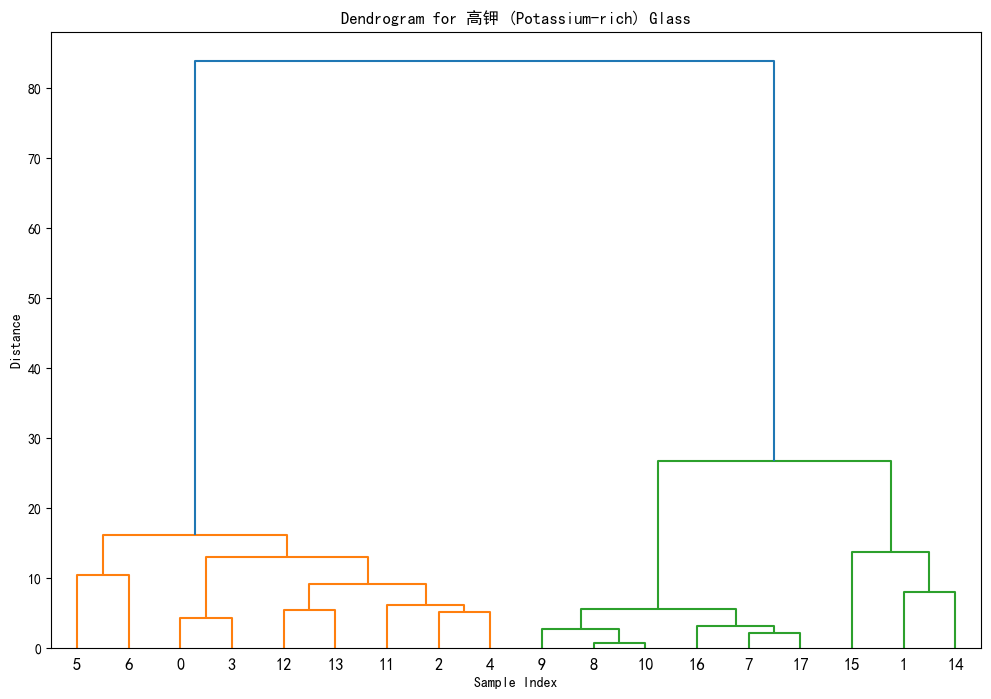

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Extract the chemical components for clustering
features_gaojia = data_gaojia.iloc[:, 4:]

# Perform hierarchical clustering using Ward's method
Z_gaojia = linkage(features_gaojia, method='ward')

# Plot the dendrogram for high potassium glass
plt.figure(figsize=(12, 8))
dendrogram(Z_gaojia)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title('Dendrogram for 高钾 (Potassium-rich) Glass')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


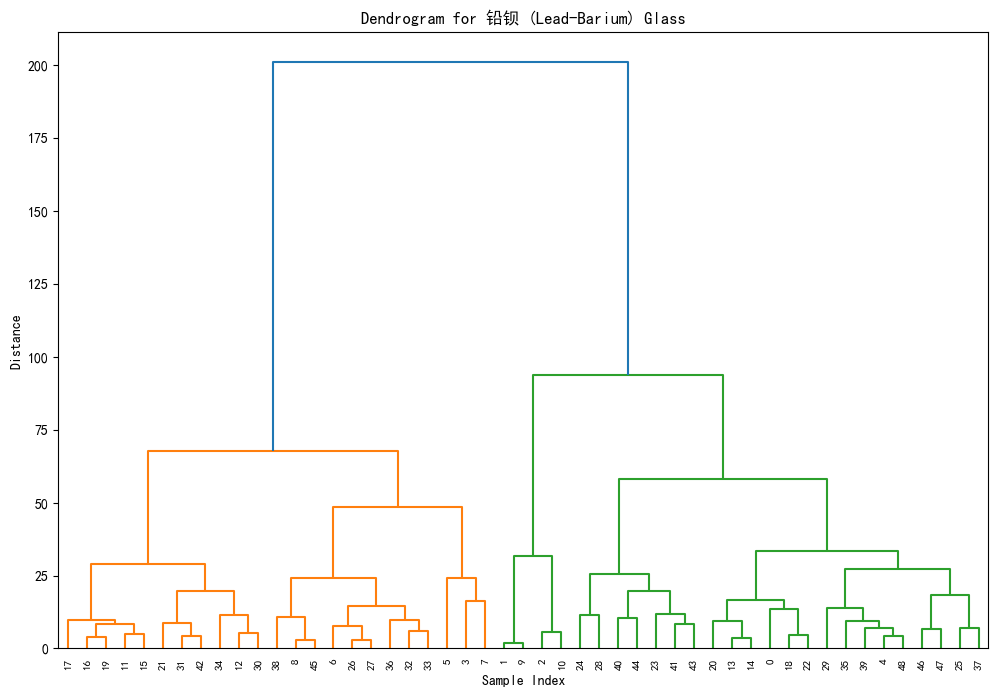

In [4]:
# Extract the chemical components for clustering from the lead-barium glass data
features_qianba = data_qianba.iloc[:, 4:]

# Perform hierarchical clustering using Ward's method
Z_qianba = linkage(features_qianba, method='ward')

# Plot the dendrogram for lead-barium glass
plt.figure(figsize=(12, 8))
dendrogram(Z_qianba)
plt.title('Dendrogram for 铅钡 (Lead-Barium) Glass')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [5]:
# Assign cluster labels to the data
# We choose 2 clusters for both types of glass
labels_gaojia = fcluster(Z_gaojia, 2, criterion='maxclust')
labels_qianba = fcluster(Z_qianba, 2, criterion='maxclust')

# Add the cluster labels to the respective dataframes
data_gaojia['Cluster'] = labels_gaojia
data_qianba['Cluster'] = labels_qianba

# Display the first few rows of each dataset with the cluster labels
data_gaojia[['文物采样点', 'Cluster']].head(), data_qianba[['文物采样点', 'Cluster']].head()


C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\2835484063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gaojia['Cluster'] = labels_gaojia
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\2835484063.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_qianba['Cluster'] = labels_qianba


(   文物采样点  Cluster
 0     01        1
 2  03部位1        2
 3  03部位2        1
 4     04        1
 5     05        1,
       文物采样点  Cluster
 1        02        2
 9        08        2
 10  08严重风化点        2
 13       11        1
 19       19        2)

In [6]:
data_gaojia[['文物采样点', 'Cluster']]

,文物采样点,Cluster
0,01,1
2,03部位1,2
3,03部位2,1
4,04,1
5,05,1
6,06部位1,1
7,06部位2,1
8,07,2
11,09,2
12,10,2


In [7]:
data_qianba[['文物采样点', 'Cluster']]

,文物采样点,Cluster
1,02,2
9,08,2
10,08严重风化点,2
13,11,1
19,19,2
20,20,1
23,23未风化点,1
24,24,1
25,25未风化点,1
26,26,2


In [8]:
# Determine the weathered and unweathered clusters for high potassium glass based on SiO2 content
cluster_mean_SiO2_gaojia = data_gaojia.groupby('Cluster')['SiO2'].mean()

# The cluster with lower mean SiO2 is considered as weathered
weathered_cluster_gaojia = cluster_mean_SiO2_gaojia.idxmin()

# Extract the sample points for weathered and unweathered clusters
weathered_points_gaojia = data_gaojia[data_gaojia['Cluster'] == weathered_cluster_gaojia]['文物采样点'].tolist()
unweathered_points_gaojia = data_gaojia[data_gaojia['Cluster'] != weathered_cluster_gaojia]['文物采样点'].tolist()

weathered_points_gaojia, unweathered_points_gaojia


(['01', '03部位2', '04', '05', '06部位1', '06部位2', '13', '14', '16'],
 ['03部位1', '07', '09', '10', '12', '18', '21', '22', '27'])

In [9]:
# Determine the cluster that contains the most labeled unweathered points for lead-barium glass
unweathered_cluster_qianba = data_qianba[data_qianba['表面风化'] == '无风化']['Cluster'].value_counts().idxmax()

# Extract the sample points for weathered and unweathered clusters
weathered_points_qianba = data_qianba[data_qianba['Cluster'] != unweathered_cluster_qianba]['文物采样点'].tolist()
unweathered_points_qianba = data_qianba[data_qianba['Cluster'] == unweathered_cluster_qianba]['文物采样点'].tolist()

weathered_points_qianba, unweathered_points_qianba



(['02',
  '08',
  '08严重风化点',
  '19',
  '26',
  '26严重风化点',
  '30部位1',
  '30部位2',
  '34',
  '36',
  '38',
  '39',
  '40',
  '41',
  '43部位1',
  '43部位2',
  '49',
  '50',
  '51部位1',
  '51部位2',
  '52',
  '54',
  '54严重风化点',
  '56',
  '57',
  '58'],
 ['11',
  '20',
  '23未风化点',
  '24',
  '25未风化点',
  '28未风化点',
  '29未风化点',
  '31',
  '32',
  '33',
  '35',
  '37',
  '42未风化点1',
  '42未风化点2',
  '44未风化点',
  '45',
  '46',
  '47',
  '48',
  '49未风化点',
  '50未风化点',
  '53未风化点',
  '55'])

In [10]:
# 上为二类分，下为4类分

In [11]:
# Cluster the high potassium glass data into 4 clusters
labels_gaojia_4 = fcluster(Z_gaojia, 4, criterion='maxclust')
data_gaojia['Cluster_4'] = labels_gaojia_4

# Cluster the lead-barium glass data into 4 clusters
labels_qianba_4 = fcluster(Z_qianba, 4, criterion='maxclust')
data_qianba['Cluster_4'] = labels_qianba_4

# Display the first few rows of each dataset with the new cluster labels
data_gaojia[['文物采样点', 'Cluster_4']].head(), data_qianba[['文物采样点', 'Cluster_4']].head()


C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\3493906527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gaojia['Cluster_4'] = labels_gaojia_4
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\3493906527.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_qianba['Cluster_4'] = labels_qianba_4


(   文物采样点  Cluster_4
 0     01          2
 2  03部位1          4
 3  03部位2          2
 4     04          2
 5     05          2,
       文物采样点  Cluster_4
 1        02          4
 9        08          3
 10  08严重风化点          3
 13       11          2
 19       19          4)

In [12]:
# Determine weathering labels for the four clusters based on mean chemical components for high potassium glass
mean_components_gaojia = data_gaojia.groupby('Cluster_4').mean()

# Assign weathering labels based on the provided insights and mean chemical components
def assign_cluster_weathering_gaojia(row):
    if row['SiO2'] > mean_components_gaojia['SiO2'].quantile(0.75):
        return '严重风化'
    elif row['SiO2'] <= mean_components_gaojia['SiO2'].quantile(0.25):
        return '未风化'
    elif row['Al2O3'] > mean_components_gaojia['Al2O3'].quantile(0.5) and row['K2O'] > mean_components_gaojia['K2O'].quantile(0.5):
        return '轻度风化'
    else:
        return '中度风化'

mean_components_gaojia['Cluster_Weathering'] = mean_components_gaojia.apply(assign_cluster_weathering_gaojia, axis=1)

# Display the reassigned weathering labels for clusters of high potassium glass
mean_components_gaojia['Cluster_Weathering']


C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\3349149898.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_components_gaojia = data_gaojia.groupby('Cluster_4').mean()


Cluster_4
1     未风化
2    轻度风化
3    严重风化
4    中度风化
Name: Cluster_Weathering, dtype: object

In [13]:
# Determine weathering labels for the four clusters based on mean chemical components for lead-barium glass
mean_components_qianba = data_qianba.groupby('Cluster_4').mean()

# Assign weathering labels based on the provided insights and mean chemical components
def assign_cluster_weathering_qianba(row):
    if row['SiO2'] > mean_components_qianba['SiO2'].quantile(0.75):
        return '未风化'
    elif row['SiO2'] <= mean_components_qianba['SiO2'].quantile(0.25):
        return '严重风化'
    elif row['Al2O3'] > mean_components_qianba['Al2O3'].quantile(0.5) and row['K2O'] > mean_components_qianba['K2O'].quantile(0.5):
        return '轻度风化'
    else:
        return '中度风化'

mean_components_qianba['Cluster_Weathering'] = mean_components_qianba.apply(assign_cluster_weathering_qianba, axis=1)

# Display the reassigned weathering labels for clusters of lead-barium glass
mean_components_qianba['Cluster_Weathering']


C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\539978201.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_components_qianba = data_qianba.groupby('Cluster_4').mean()


Cluster_4
1     未风化
2    轻度风化
3    严重风化
4    中度风化
Name: Cluster_Weathering, dtype: object

In [14]:
# Extract the samples in each cluster for high potassium glass and lead-barium glass
gaojia_clusters = data_gaojia.groupby('Cluster_4')['文物采样点'].apply(list)
qianba_clusters = data_qianba.groupby('Cluster_4')['文物采样点'].apply(list)

gaojia_clusters, qianba_clusters


(Cluster_4
 1                     [06部位1, 06部位2]
 2    [01, 03部位2, 04, 05, 13, 14, 16]
 3           [07, 09, 10, 12, 22, 27]
 4                    [03部位1, 18, 21]
 Name: 文物采样点, dtype: object,
 Cluster_4
 1    [28未风化点, 29未风化点, 31, 32, 33, 35, 37, 44未风化点, 4...
 2    [11, 20, 23未风化点, 24, 25未风化点, 42未风化点1, 42未风化点2,...
 3                           [08, 08严重风化点, 26, 26严重风化点]
 4    [02, 19, 30部位1, 30部位2, 34, 36, 38, 39, 40, 41,...
 Name: 文物采样点, dtype: object)

In [15]:
import numpy as np

# 定义风化标签的顺序
weathering_order = ['未风化', '轻度风化', '中度风化', '严重风化']

# 铅钡玻璃聚类和风化状态
qianba_clusters_df = pd.DataFrame({
    'Cluster': qianba_clusters.index,
    'Sample Points': qianba_clusters.values,
    'Weathering State': mean_components_qianba['Cluster_Weathering'].values
})

# 创建空的DataFrame来存储结果
weathering_summary_qianba = pd.DataFrame(columns=['Weathering State', 'Sample Points', 'SiO2 Mean'])
pd.set_option('display.max_colwidth', None)
# 对于每个风化状态，收集样本点并计算SiO2均值
for weathering_state in weathering_order:
    sample_points = []
    sio2_values = []
    
    # 在铅钡玻璃的每个聚类中查找对应的风化状态
    for index, row in qianba_clusters_df.iterrows():
        if row['Weathering State'] == weathering_state:
            sample_points += row['Sample Points']
            sio2_values += data_qianba[data_qianba['文物采样点'].isin(row['Sample Points'])]['SiO2'].tolist()

    # 将结果添加到总结DataFrame中
    weathering_summary_qianba = weathering_summary_qianba.append({
        'Weathering State': weathering_state,
        'Sample Points': ', '.join(sample_points),
        'SiO2 Mean': np.mean(sio2_values)
    }, ignore_index=True)

# 显示风化总结
weathering_summary_qianba





C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\235196710.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weathering_summary_qianba = weathering_summary_qianba.append({
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\235196710.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weathering_summary_qianba = weathering_summary_qianba.append({
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\235196710.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weathering_summary_qianba = weathering_summary_qianba.append({
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\235196710.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

,Weathering State,Sample Points,SiO2 Mean
0,未风化,"28未风化点, 29未风化点, 31, 32, 33, 35, 37, 44未风化点, 45, 48, 53未风化点",65.120034
1,轻度风化,"11, 20, 23未风化点, 24, 25未风化点, 42未风化点1, 42未风化点2, 46, 47, 49未风化点, 50未风化点, 55",48.686472
2,中度风化,"02, 19, 30部位1, 30部位2, 34, 36, 38, 39, 40, 41, 43部位1, 43部位2, 49, 50, 51部位1, 51部位2, 52, 54, 54严重风化点, 56, 57, 58",27.483508
3,严重风化,"08, 08严重风化点, 26, 26严重风化点",12.104672


In [16]:
#weathering_summary_qianba.to_excel('E:\\数学建模国赛\\2022数学建模赛题\\C题\\weathering_summary_qianba.xlsx', index=True)

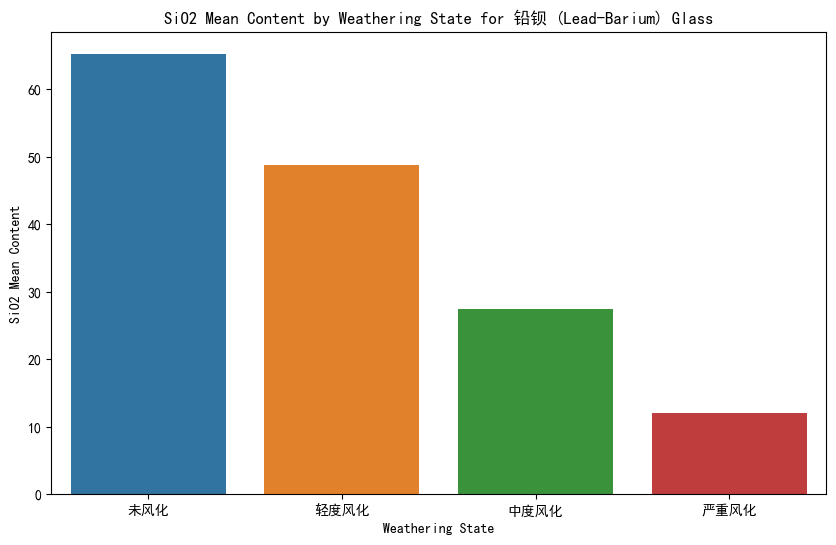

In [17]:
# 绘制SiO2均值随风化程度变化的趋势图
plt.figure(figsize=(10, 6))
sns.barplot(x='Weathering State', y='SiO2 Mean', data=weathering_summary_qianba, order=weathering_order)
plt.title('SiO2 Mean Content by Weathering State for 铅钡 (Lead-Barium) Glass')
plt.xlabel('Weathering State')
plt.ylabel('SiO2 Mean Content')
plt.show()

In [18]:
# 高钾玻璃聚类和风化状态
gaojia_clusters_df = pd.DataFrame({
    'Cluster': gaojia_clusters.index,
    'Sample Points': gaojia_clusters.values,
    'Weathering State': mean_components_gaojia['Cluster_Weathering'].values
})

# 创建空的DataFrame来存储结果
weathering_summary_gaojia = pd.DataFrame(columns=['Weathering State', 'Sample Points', 'SiO2 Mean'])

# 对于每个风化状态，收集样本点并计算SiO2均值
for weathering_state in weathering_order:
    sample_points = []
    sio2_values = []
    
    # 在高钾玻璃的每个聚类中查找对应的风化状态
    for index, row in gaojia_clusters_df.iterrows():
        if row['Weathering State'] == weathering_state:
            sample_points += row['Sample Points']
            sio2_values += data_gaojia[data_gaojia['文物采样点'].isin(row['Sample Points'])]['SiO2'].tolist()

    # 将结果添加到总结DataFrame中
    weathering_summary_gaojia = weathering_summary_gaojia.append({
        'Weathering State': weathering_state,
        'Sample Points': ', '.join(sample_points),
        'SiO2 Mean': np.mean(sio2_values)
    }, ignore_index=True)

# 显示高钾玻璃风化总结
weathering_summary_gaojia






C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\2593197718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weathering_summary_gaojia = weathering_summary_gaojia.append({
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\2593197718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weathering_summary_gaojia = weathering_summary_gaojia.append({
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\2593197718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weathering_summary_gaojia = weathering_summary_gaojia.append({
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\2593197718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

,Weathering State,Sample Points,SiO2 Mean
0,未风化,"06部位1, 06部位2",64.450268
1,轻度风化,"01, 03部位2, 04, 05, 13, 14, 16",65.041148
2,中度风化,"03部位1, 18, 21",82.196284
3,严重风化,"07, 09, 10, 12, 22, 27",94.330974


In [19]:
#weathering_summary_gaojia.to_excel('E:\\数学建模国赛\\2022数学建模赛题\\C题\\weathering_summary_gaojia.xlsx', index=True)

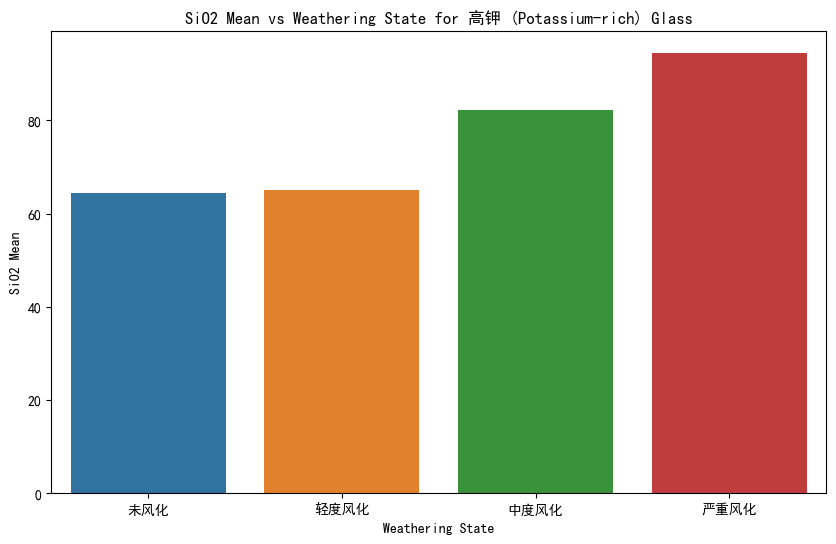

In [20]:
# 绘制SiO2均值随风化程度的变化趋势图
plt.figure(figsize=(10, 6))
sns.barplot(x='Weathering State', y='SiO2 Mean', data=weathering_summary_gaojia)
plt.title('SiO2 Mean vs Weathering State for 高钾 (Potassium-rich) Glass')
plt.xlabel('Weathering State')
plt.ylabel('SiO2 Mean')
plt.show()

In [21]:
# 加载中心化对数比变换后的数据
transformed_data_path = 'E:\\数学建模国赛\\2022数学建模赛题\\C题\\一二表单合并对数中心化转换数据.xlsx'
transformed_data = pd.read_excel(transformed_data_path)

# 显示前几行以查看数据结构
transformed_data.head()


,Unnamed: 0,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,0,高钾,无风化,01,3.045978,0.0,1.108685,0.650820,-1.332161,0.175740,-0.639014,0.160355,0.000000,0.000000,-1.035896,0.000000,0.0,-2.134508
1,1,铅钡,风化,02,2.676664,0.0,-0.865813,-0.064452,-0.749089,0.831113,-0.294026,-2.261677,2.944652,0.000000,0.357963,-2.575334,0.0,0.000000
2,2,高钾,无风化,03部位1,3.586159,0.0,0.766410,-0.182189,0.000000,0.520860,0.000000,-1.128785,-2.266618,0.000000,-1.295839,0.000000,0.0,0.000000
3,3,高钾,无风化,03部位2,3.090699,0.0,1.483527,0.738107,-0.927387,0.673001,-0.261639,0.595531,-0.688158,0.019074,-1.388422,-3.334332,0.0,0.000000
4,4,高钾,无风化,04,2.968764,0.0,1.049957,0.743836,-0.774386,0.643457,-0.496365,-0.439747,0.000000,0.000000,-1.454794,0.000000,0.0,-2.240723


In [22]:
# 从高钾玻璃的风化总结中提取样本点和风化状态的映射
gaojia_weathering_mapping = {}
for index, row in weathering_summary_gaojia.iterrows():
    sample_points = row['Sample Points'].split(", ")
    for sample_point in sample_points:
        gaojia_weathering_mapping[sample_point] = row['Weathering State']

# 在转换后的数据中添加风化状态列
transformed_data_gaojia = transformed_data[transformed_data['类型'] == '高钾'].copy()
transformed_data_gaojia['风化状态'] = transformed_data_gaojia['文物采样点'].map(gaojia_weathering_mapping)

# 显示前几行以确认风化状态已添加
transformed_data_gaojia.head()


,Unnamed: 0,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,风化状态
0,0,高钾,无风化,01,3.045978,0.0,1.108685,0.650820,-1.332161,0.175740,-0.639014,0.160355,0.000000,0.000000,-1.035896,0.000000,0.0,-2.134508,轻度风化
2,2,高钾,无风化,03部位1,3.586159,0.0,0.766410,-0.182189,0.000000,0.520860,0.000000,-1.128785,-2.266618,0.000000,-1.295839,0.000000,0.0,0.000000,中度风化
3,3,高钾,无风化,03部位2,3.090699,0.0,1.483527,0.738107,-0.927387,0.673001,-0.261639,0.595531,-0.688158,0.019074,-1.388422,-3.334332,0.0,0.000000,轻度风化
4,4,高钾,无风化,04,2.968764,0.0,1.049957,0.743836,-0.774386,0.643457,-0.496365,-0.439747,0.000000,0.000000,-1.454794,0.000000,0.0,-2.240723,轻度风化
5,5,高钾,无风化,05,3.159146,0.0,1.432148,1.033509,-0.390212,1.053712,0.001983,0.223598,0.000000,0.000000,-1.023067,-3.774602,0.0,-1.716214,轻度风化


In [23]:
# 计算高钾玻璃样本中每种风化状态下的各种化学成分的平均值
gaojia_chemical_means = transformed_data_gaojia.groupby('风化状态').mean(numeric_only=True).drop(columns=['Unnamed: 0'])

# 重置索引以便风化状态成为列
gaojia_chemical_means.reset_index(inplace=True)

# 显示结果
gaojia_chemical_means


,风化状态,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,严重风化,4.187045,0.000000,-0.328478,-0.664817,-0.286859,0.194529,-1.714985,-0.060020,0.000000,0.000000,-1.326415,0.000000,0.000000,0.000000
1,中度风化,3.385352,0.000000,0.685683,0.058233,-0.506959,0.437980,-0.109970,-0.377913,-1.153139,-0.171589,-1.012680,-1.203819,-0.031179,0.000000
2,未风化,3.175855,0.000000,1.041114,0.318897,-0.361296,1.382601,0.357944,-0.127101,-2.306535,-0.831093,0.490289,-3.140674,0.000000,0.000000
3,轻度风化,3.068639,-0.023289,1.373183,0.910908,-0.836592,0.747729,-0.724507,-0.252480,-0.539366,0.002725,-1.314934,-1.541811,0.000000,-0.870206


In [24]:
gaojia_chemical_means.to_excel('E:\\数学建模国赛\\2022数学建模赛题\\C题\\gaojia_chemical_means.xlsx', index=True)

In [25]:
# 从铅钡玻璃的风化总结中提取样本点和风化状态的映射
qianba_weathering_mapping = {}
for index, row in weathering_summary_qianba.iterrows():
    sample_points = row['Sample Points'].split(", ")
    for sample_point in sample_points:
        qianba_weathering_mapping[sample_point] = row['Weathering State']

# 在转换后的数据中添加风化状态列
transformed_data_qianba = transformed_data[transformed_data['类型'] == '铅钡'].copy()
transformed_data_qianba['风化状态'] = transformed_data_qianba['文物采样点'].map(qianba_weathering_mapping)

# 计算铅钡玻璃样本中每种风化状态下的各种化学成分的平均值
qianba_chemical_means = transformed_data_qianba.groupby('风化状态').mean(numeric_only=True).drop(columns=['Unnamed: 0'])


# 重置索引以便风化状态成为列
qianba_chemical_means.reset_index(inplace=True)

# 显示结果
qianba_chemical_means


,风化状态,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,严重风化,0.684589,0.000000,-0.579130,-0.768208,0.000000,-1.471402,0.000000,0.258616,1.882089,1.953299,0.037245,-2.249288,0.000000,0.252191
1,中度风化,2.098098,-0.020396,-0.556718,-0.229382,-0.846689,-0.234033,-0.983115,-0.968011,2.703618,0.903891,0.062492,-1.657362,-0.272393,0.000000
2,未风化,3.484047,-0.084786,-1.874299,-0.592301,-0.375009,0.868327,-0.551316,-1.325975,2.107163,1.004854,-0.879073,-1.591966,-0.213974,0.024309
3,轻度风化,2.723456,0.232284,-1.367564,-0.681849,-0.770555,0.011288,-0.193773,-0.572183,2.031606,1.226762,-1.197861,-1.441608,0.000000,0.000000


In [26]:
qianba_chemical_means.to_excel('E:\\数学建模国赛\\2022数学建模赛题\\C题\\qianba_chemical_means.xlsx', index=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# 定义风化状态的顺序
weathering_order = ['未风化', '轻度风化', '中度风化', '严重风化']

# 为风化状态编码
le = LabelEncoder()
le.fit(weathering_order)
gaojia_chemical_means['风化状态编码'] = le.transform(gaojia_chemical_means['风化状态'])

# 定义用于存储结果的DataFrame
gaojia_regression_results = pd.DataFrame(columns=['Element', 'Equation', 'R-Squared'])

# 对每个化学成分进行二次多项式回归
for element in gaojia_chemical_means.columns[1:-1]:
    X = gaojia_chemical_means[['风化状态编码']]
    y = gaojia_chemical_means[element]
    
    # 创建二次多项式特征
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # 训练模型
    model = LinearRegression()
    model.fit(X_poly, y)

    # 计算R^2值
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    # 创建方程字符串
    equation = f"{model.coef_[2]:.3f} * x^2 + {model.coef_[1]:.3f} * x + {model.intercept_:.3f}"

    # 将结果添加到结果DataFrame中
    gaojia_regression_results = gaojia_regression_results.append({
        'Element': element,
        'Equation': equation,
        'R-Squared': r2
    }, ignore_index=True)

# 显示高钾玻璃的回归结果
gaojia_regression_results



C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\4276647047.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gaojia_regression_results = gaojia_regression_results.append({
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\4276647047.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gaojia_regression_results = gaojia_regression_results.append({
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\4276647047.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gaojia_regression_results = gaojia_regression_results.append({
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\4276647047.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

,Element,Equation,R-Squared
0,SiO2,0.174 * x^2 + -0.877 * x + 4.163,0.984373
1,Na2O,-0.006 * x^2 + 0.010 * x + -0.001,0.933333
2,K2O,-0.171 * x^2 + 1.058 * x + -0.297,0.987596
3,CaO,-0.033 * x^2 + 0.597 * x + -0.625,0.975385
4,MgO,-0.064 * x^2 + 0.041 * x + -0.336,0.726500
5,Al2O3,-0.220 * x^2 + 0.919 * x + 0.080,0.671640
6,Fe2O3,-0.672 * x^2 + 2.360 * x + -1.736,0.996450
7,CuO,0.048 * x^2 + -0.177 * x + -0.107,0.246422
8,PbO,0.730 * x^2 + -2.467 * x + 0.146,0.855043
9,BaO,0.251 * x^2 + -0.819 * x + 0.099,0.582581


In [28]:
# 为风化状态编码
qianba_chemical_means['风化状态编码'] = le.transform(qianba_chemical_means['风化状态'])

# 定义用于存储结果的DataFrame
qianba_regression_results = pd.DataFrame(columns=['Element', 'Equation', 'R-Squared'])

# 对每个化学成分进行二次多项式回归
for element in qianba_chemical_means.columns[1:-1]:
    X = qianba_chemical_means[['风化状态编码']]
    y = qianba_chemical_means[element]
    
    # 创建二次多项式特征
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # 训练模型
    model = LinearRegression()
    model.fit(X_poly, y)

    # 计算R^2值
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    # 创建方程字符串
    equation = f"{model.coef_[2]:.3f} * x^2 + {model.coef_[1]:.3f} * x + {model.intercept_:.3f}"

    # 将结果添加到结果DataFrame中
    qianba_regression_results = qianba_regression_results.append({
        'Element': element,
        'Equation': equation,
        'R-Squared': r2
    }, ignore_index=True)

# 显示铅钡玻璃的回归结果
qianba_regression_results


C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\3357776410.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  qianba_regression_results = qianba_regression_results.append({
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\3357776410.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  qianba_regression_results = qianba_regression_results.append({
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\3357776410.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  qianba_regression_results = qianba_regression_results.append({
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\3357776410.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

,Element,Equation,R-Squared
0,SiO2,-0.544 * x^2 + 2.381 * x + 0.579,0.946807
1,Na2O,0.084 * x^2 + -0.190 * x + 0.021,0.842658
2,K2O,0.121 * x^2 + -0.732 * x + -0.421,0.595429
3,CaO,-0.157 * x^2 + 0.461 * x + -0.709,0.589746
4,MgO,0.113 * x^2 + -0.522 * x + -0.109,0.479651
5,Al2O3,-0.524 * x^2 + 2.126 * x + -1.563,0.940637
6,Fe2O3,0.335 * x^2 + -1.020 * x + -0.074,0.802470
7,CuO,0.495 * x^2 + -1.770 * x + 0.271,0.997874
8,PbO,-0.224 * x^2 + 0.658 * x + 1.979,0.518350
9,BaO,0.318 * x^2 + -1.161 * x + 1.902,0.921279


In [29]:
threshold = 0.85

# 筛选R-Squared值大于阈值的化学成分
gaojia_selected_elements = gaojia_regression_results[gaojia_regression_results['R-Squared'] > threshold]
gaojia_selected_elements['Equation'] = gaojia_selected_elements['Equation'].str.replace('^', '**', regex=False)
#gaojia_selected_elements.to_excel('E:\\数学建模国赛\\2022数学建模赛题\\C题\\Regression equations available to gaojia.xlsx', index=True)
gaojia_selected_elements

C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\2286956280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaojia_selected_elements['Equation'] = gaojia_selected_elements['Equation'].str.replace('^', '**', regex=False)


,Element,Equation,R-Squared
0,SiO2,0.174 * x**2 + -0.877 * x + 4.163,0.984373
1,Na2O,-0.006 * x**2 + 0.010 * x + -0.001,0.933333
2,K2O,-0.171 * x**2 + 1.058 * x + -0.297,0.987596
3,CaO,-0.033 * x**2 + 0.597 * x + -0.625,0.975385
6,Fe2O3,-0.672 * x**2 + 2.360 * x + -1.736,0.996450
8,PbO,0.730 * x**2 + -2.467 * x + 0.146,0.855043
13,SO2,-0.218 * x**2 + 0.392 * x + -0.044,0.933333


In [30]:
qianba_selected_elements = qianba_regression_results[qianba_regression_results['R-Squared'] > threshold]
qianba_selected_elements['Equation'] = qianba_selected_elements['Equation'].str.replace('^', '**')
#qianba_selected_elements.to_excel('E:\\数学建模国赛\\2022数学建模赛题\\C题\\Regression equations available to qianba.xlsx', index=True)
qianba_selected_elements

C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\1649209725.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  qianba_selected_elements['Equation'] = qianba_selected_elements['Equation'].str.replace('^', '**')
C:\Users\chen'bu'rong\AppData\Local\Temp\ipykernel_9584\1649209725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qianba_selected_elements['Equation'] = qianba_selected_elements['Equation'].str.replace('^', '**')


,Element,Equation,R-Squared
0,SiO2,-0.544 * x**2 + 2.381 * x + 0.579,0.946807
5,Al2O3,-0.524 * x**2 + 2.126 * x + -1.563,0.940637
7,CuO,0.495 * x**2 + -1.770 * x + 0.271,0.997874
9,BaO,0.318 * x**2 + -1.161 * x + 1.902,0.921279
10,P2O5,-0.086 * x**2 + -0.207 * x + 0.117,0.897751
11,SrO,-0.110 * x**2 + 0.580 * x + -2.219,0.950415
12,SnO2,0.122 * x**2 + -0.359 * x + -0.009,0.974760
13,SO2,0.057 * x**2 + -0.244 * x + 0.236,0.882758


In [31]:
# 读取风化总结文件
weathering_summary_gaojia = pd.read_excel('E:\\数学建模国赛\\2022数学建模赛题\\C题\\weathering_summary_gaojia.xlsx')
weathering_summary_qianba = pd.read_excel('E:\\数学建模国赛\\2022数学建模赛题\\C题\\weathering_summary_qianba.xlsx')

# 读取一二表单合并对数中心化转换数据
transformed_data = pd.read_excel('E:\\数学建模国赛\\2022数学建模赛题\\C题\\一二表单合并对数中心化转换数据.xlsx')

# 显示高钾和铅钡风化总结的前几行
weathering_summary_gaojia.head(), weathering_summary_qianba.head()


(   Unnamed: 0 Weathering State                  Sample Points  SiO2 Mean
 0           0              未风化                   06部位1, 06部位2  64.450268
 1           1             轻度风化  01, 03部位2, 04, 05, 13, 14, 16  65.041148
 2           2             中度风化                  03部位1, 18, 21  82.196284
 3           3             严重风化         07, 09, 10, 12, 22, 27  94.330974,
    Unnamed: 0 Weathering State  \
 0           0              未风化   
 1           1             轻度风化   
 2           2             中度风化   
 3           3             严重风化   
 
                                                                                                    Sample Points  \
 0                                                     28未风化点, 29未风化点, 31, 32, 33, 35, 37, 44未风化点, 45, 48, 53未风化点   
 1                                       11, 20, 23未风化点, 24, 25未风化点, 42未风化点1, 42未风化点2, 46, 47, 49未风化点, 50未风化点, 55   
 2  02, 19, 30部位1, 30部位2, 34, 36, 38, 39, 40, 41, 43部位1, 43部位2, 49, 50, 51部位1, 51部位2, 52, 54, 54严重风化点

In [32]:
# 分别为高钾和铅钡数据分配风化状态
def assign_weathering_state(row, weathering_summary):
    for _, ws_row in weathering_summary.iterrows():
        if row['文物采样点'] in ws_row['Sample Points']:
            return ws_row['Weathering State']
    return None

# 高钾数据
transformed_data_gaojia = transformed_data[transformed_data['类型'] == '高钾'].copy()
transformed_data_gaojia['风化状态'] = transformed_data_gaojia.apply(
    lambda row: assign_weathering_state(row, weathering_summary_gaojia), axis=1)

# 铅钡数据
transformed_data_qianba = transformed_data[transformed_data['类型'] == '铅钡'].copy()
transformed_data_qianba['风化状态'] = transformed_data_qianba.apply(
    lambda row: assign_weathering_state(row, weathering_summary_qianba), axis=1)

# 删除未风化的点
transformed_data_gaojia = transformed_data_gaojia[
    (transformed_data_gaojia['风化状态'] != '未风化') &
    (transformed_data_gaojia['风化状态'] != '轻度风化')
]

transformed_data_qianba = transformed_data_qianba[
    (transformed_data_qianba['风化状态'] != '未风化') &
    (transformed_data_qianba['风化状态'] != '轻度风化')
]


# 显示更新后的数据的前几行
transformed_data_gaojia.head(), transformed_data_qianba.head()


(    Unnamed: 0  类型 表面风化  文物采样点      SiO2  Na2O       K2O       CaO  MgO  \
 2            2  高钾  无风化  03部位1  3.586159   0.0  0.766410 -0.182189  0.0   
 8            8  高钾   风化     07  3.830498   0.0  0.000000 -0.630456  0.0   
 11          11  高钾   风化     09  4.257652   0.0 -0.824068 -0.774471  0.0   
 12          12  高钾   风化     10  4.372977   0.0 -0.282742 -1.760008  0.0   
 14          14  高钾   风化     12  4.264655   0.0 -0.271769 -0.610224  0.0   
 
        Al2O3     Fe2O3       CuO       PbO  BaO      P2O5  SrO  SnO2  SO2  \
 2   0.520860  0.000000 -1.128785 -2.266618  0.0 -1.295839  0.0   0.0  0.0   
 8  -0.015018 -2.470072  0.477459  0.000000  0.0 -1.192411  0.0   0.0  0.0   
 11 -0.018804 -1.435870  0.141819  0.000000  0.0 -1.346258  0.0   0.0  0.0   
 12 -0.410081 -1.546434 -0.373713  0.000000  0.0  0.000000  0.0   0.0  0.0   
 14  0.096717 -1.519594  0.219055  0.000000  0.0 -2.178840  0.0   0.0  0.0   
 
     风化状态  
 2   中度风化  
 8   严重风化  
 11  严重风化  
 12  严重风化  
 14  严重风化  ,

In [33]:
transformed_gaojia_weathered_state = pd.DataFrame(transformed_data_gaojia)
transformed_gaojia_weathered_state.to_excel('E:\\数学建模国赛\\2022数学建模赛题\\C题\\transformed_gaojia_weathered_state.xlsx', index=True)

transformed_gaojia_weathered_state

,Unnamed: 0,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,风化状态
2,2,高钾,无风化,03部位1,3.586159,0.0,0.766410,-0.182189,0.000000,0.520860,0.000000,-1.128785,-2.266618,0.000000,-1.295839,0.000000,0.000000,0.0,中度风化
8,8,高钾,风化,07,3.830498,0.0,0.000000,-0.630456,0.000000,-0.015018,-2.470072,0.477459,0.000000,0.000000,-1.192411,0.000000,0.000000,0.0,严重风化
11,11,高钾,风化,09,4.257652,0.0,-0.824068,-0.774471,0.000000,-0.018804,-1.435870,0.141819,0.000000,0.000000,-1.346258,0.000000,0.000000,0.0,严重风化
12,12,高钾,风化,10,4.372977,0.0,-0.282742,-1.760008,0.000000,-0.410081,-1.546434,-0.373713,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,严重风化
14,14,高钾,风化,12,4.264655,0.0,-0.271769,-0.610224,0.000000,0.096717,-1.519594,0.219055,0.000000,0.000000,-2.178840,0.000000,0.000000,0.0,严重风化
18,18,高钾,无风化,18,3.423056,0.0,1.290637,0.000000,-0.526930,0.162944,0.000000,0.000000,0.000000,0.000000,-0.644713,-3.611458,-0.093536,0.0,中度风化
21,21,高钾,无风化,21,3.146842,0.0,0.000000,0.356889,-0.993948,0.630136,-0.329909,-0.004956,-1.192799,-0.514766,-1.097489,0.000000,0.000000,0.0,中度风化
22,22,高钾,风化,22,4.234402,0.0,-0.592288,0.215634,-0.737471,0.961580,-1.341006,-0.889020,0.000000,0.000000,-1.851831,0.000000,0.000000,0.0,严重风化
28,28,高钾,风化,27,4.162084,0.0,0.000000,-0.429375,-0.983686,0.552783,-1.976938,0.064283,0.000000,0.000000,-1.389151,0.000000,0.000000,0.0,严重风化


In [34]:
transformed_qianba_weathered_state = pd.DataFrame(transformed_data_qianba)
#transformed_qianba_weathered_state.to_excel('E:\\数学建模国赛\\2022数学建模赛题\\C题\\transformed_qianba_weathered_state.xlsx', index=True)
transformed_qianba_weathered_state

,Unnamed: 0,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,风化状态
1,1,铅钡,风化,02,2.676664,0.000000,-0.865813,-0.064452,-0.749089,0.831113,-0.294026,-2.261677,2.944652,0.000000,0.357963,-2.575334,0.000000,0.000000,中度风化
9,9,铅钡,风化,08,1.440546,0.000000,0.000000,-1.170120,0.000000,-1.269492,0.000000,0.780605,1.794038,1.879218,-0.284009,-2.556414,0.000000,-0.614372,严重风化
10,10,铅钡,风化,08严重风化点,-0.131353,0.000000,0.000000,-0.499560,0.000000,-1.555221,0.000000,-0.515358,1.820120,1.762073,0.363290,-2.294459,0.000000,1.050467,严重风化
19,19,铅钡,风化,19,2.118987,0.000000,0.000000,-0.195136,-1.797771,0.002428,-0.984959,-0.014522,2.486867,0.406958,0.908017,-2.930869,0.000000,0.000000,中度风化
26,26,铅钡,风化,26,1.515670,0.000000,0.000000,-1.104863,0.000000,-1.826182,0.000000,0.888513,1.915900,2.004011,-0.328474,-2.268014,0.000000,-0.796562,严重风化
27,27,铅钡,风化,26严重风化点,-0.086506,0.000000,-2.316521,-0.298290,0.000000,-1.234715,0.000000,-0.119296,1.998297,2.167893,0.398174,-1.878266,0.000000,1.369229,严重风化
31,31,铅钡,无风化,30部位1,2.374572,0.000000,-0.818149,0.340114,-1.181942,0.308437,-0.410323,0.000000,2.507448,1.169434,0.000000,-2.211561,-2.078030,0.000000,中度风化
32,32,铅钡,无风化,30部位2,2.459503,0.000000,0.000000,0.295042,-1.822866,0.201146,-0.141564,0.000000,2.481199,1.187465,-0.805932,-1.883491,-1.970502,0.000000,中度风化
36,36,铅钡,风化,34,3.014157,0.000000,-1.949526,-0.811693,0.000000,-0.080806,-1.318255,-0.151122,3.277295,1.739353,-1.642042,-2.077360,0.000000,0.000000,中度风化
38,38,铅钡,风化,36,3.460126,0.579562,-2.184058,-1.212197,0.000000,0.252059,-1.357379,-0.603607,3.510396,2.164375,-2.877205,-1.732073,0.000000,0.000000,中度风化


In [35]:
qianba_equations=qianba_selected_elements.copy()
qianba_data=transformed_qianba_weathered_state.copy()

In [36]:
!pip install sympy

In [37]:
# 定义风化状态的映射
weathering_mapping = {
    '未风化': 0,
    '轻度风化': 1,
    '中度风化': 2,
    '严重风化': 3
}

# 将风化状态转换为数值
qianba_data['风化程度'] = qianba_data['风化状态'].map(weathering_mapping)

# 显示更新后的前几行数据
qianba_data[['风化状态', '风化程度']].head()


,风化状态,风化程度
1,中度风化,2
9,严重风化,3
10,严重风化,3
19,中度风化,2
26,严重风化,3


In [38]:
qianba_data_latest=qianba_data
qianba_data_latest

,Unnamed: 0,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,风化状态,风化程度
1,1,铅钡,风化,02,2.676664,0.000000,-0.865813,-0.064452,-0.749089,0.831113,-0.294026,-2.261677,2.944652,0.000000,0.357963,-2.575334,0.000000,0.000000,中度风化,2
9,9,铅钡,风化,08,1.440546,0.000000,0.000000,-1.170120,0.000000,-1.269492,0.000000,0.780605,1.794038,1.879218,-0.284009,-2.556414,0.000000,-0.614372,严重风化,3
10,10,铅钡,风化,08严重风化点,-0.131353,0.000000,0.000000,-0.499560,0.000000,-1.555221,0.000000,-0.515358,1.820120,1.762073,0.363290,-2.294459,0.000000,1.050467,严重风化,3
19,19,铅钡,风化,19,2.118987,0.000000,0.000000,-0.195136,-1.797771,0.002428,-0.984959,-0.014522,2.486867,0.406958,0.908017,-2.930869,0.000000,0.000000,中度风化,2
26,26,铅钡,风化,26,1.515670,0.000000,0.000000,-1.104863,0.000000,-1.826182,0.000000,0.888513,1.915900,2.004011,-0.328474,-2.268014,0.000000,-0.796562,严重风化,3
27,27,铅钡,风化,26严重风化点,-0.086506,0.000000,-2.316521,-0.298290,0.000000,-1.234715,0.000000,-0.119296,1.998297,2.167893,0.398174,-1.878266,0.000000,1.369229,严重风化,3
31,31,铅钡,无风化,30部位1,2.374572,0.000000,-0.818149,0.340114,-1.181942,0.308437,-0.410323,0.000000,2.507448,1.169434,0.000000,-2.211561,-2.078030,0.000000,中度风化,2
32,32,铅钡,无风化,30部位2,2.459503,0.000000,0.000000,0.295042,-1.822866,0.201146,-0.141564,0.000000,2.481199,1.187465,-0.805932,-1.883491,-1.970502,0.000000,中度风化,2
36,36,铅钡,风化,34,3.014157,0.000000,-1.949526,-0.811693,0.000000,-0.080806,-1.318255,-0.151122,3.277295,1.739353,-1.642042,-2.077360,0.000000,0.000000,中度风化,2
38,38,铅钡,风化,36,3.460126,0.579562,-2.184058,-1.212197,0.000000,0.252059,-1.357379,-0.603607,3.510396,2.164375,-2.877205,-1.732073,0.000000,0.000000,中度风化,2


In [39]:
qianba_equations_latest=qianba_equations
qianba_equations_latest


,Element,Equation,R-Squared
0,SiO2,-0.544 * x**2 + 2.381 * x + 0.579,0.946807
5,Al2O3,-0.524 * x**2 + 2.126 * x + -1.563,0.940637
7,CuO,0.495 * x**2 + -1.770 * x + 0.271,0.997874
9,BaO,0.318 * x**2 + -1.161 * x + 1.902,0.921279
10,P2O5,-0.086 * x**2 + -0.207 * x + 0.117,0.897751
11,SrO,-0.110 * x**2 + 0.580 * x + -2.219,0.950415
12,SnO2,0.122 * x**2 + -0.359 * x + -0.009,0.974760
13,SO2,0.057 * x**2 + -0.244 * x + 0.236,0.882758


In [40]:
# 创建一个新的DataFrame来保存未风化前的化学成分的预测结果
from scipy.stats import zscore

qianba_predictions_unweathered = qianba_data_latest[['类型', '表面风化', '文物采样点', '风化状态', '风化程度']].copy()

# 遍历每个元素的回归方程
for index, row in qianba_equations_latest.iterrows():
    element = row['Element']
    equation = row['Equation']

    # 如果元素在数据中存在
    if element in qianba_data_latest.columns:
        distances = [] # 用于保存元素的距离
        for i, weathering_point in qianba_data_latest.iterrows():
            weathering_degree = weathering_point['风化程度']
            original_value = weathering_point[element]
            predicted_value = eval(equation.replace('x', str(weathering_degree)))
            distance = original_value - predicted_value
            distances.append(distance)

        # 计算z分数并处理异常值
        z_scores = zscore(distances)
        threshold = 2
        processed_distances = [np.sqrt(abs(dist)) -2.5 if abs(z) > threshold else dist for dist, z in zip(distances, z_scores)]

        # 在未风化时预测化学成分的含量，并保存预测值
        for (i, weathering_point), processed_distance in zip(qianba_data_latest.iterrows(), processed_distances):
            weathering_degree = 1.05
            predicted_value = eval(equation.replace('x', str(weathering_degree)))
            unweathered_value = predicted_value - processed_distance
            qianba_predictions_unweathered.loc[i, element] = unweathered_value

# 显示前几行未风化前的化学成分的预测结果
qianba_predictions_unweathered.head()


,类型,表面风化,文物采样点,风化状态,风化程度,SiO2,Al2O3,CuO,BaO,P2O5,SrO,SnO2,SO2
1,铅钡,风化,02,中度风化,2,2.967626,-0.146523,-0.069086,1.885545,-1.194128,-0.654941,-0.490445,0.018643
9,铅钡,风化,08,严重风化,3,3.864744,1.460082,-2.406368,0.435327,-1.189156,-0.643861,-0.239445,0.674015
10,铅钡,风化,08严重风化点,严重风化,3,3.259594,1.745811,-1.110405,0.552472,-1.836455,-0.905816,-0.239445,1.526046
19,铅钡,风化,19,中度风化,2,3.525303,0.682162,-2.316240,1.478587,-1.744182,-0.299406,-0.490445,0.018643
26,铅钡,风化,26,严重风化,3,3.789620,2.016772,-2.514276,0.310534,-1.144691,-0.932261,-0.239445,1.640666


In [41]:
# 定义缺失的化学成分列
missing_elements_columns = ['K2O', 'CaO', 'PbO','MgO','Na2O', 'Fe2O3']

# 将缺失的化学成分列从原始数据集复制到预测结果DataFrame中
for col in missing_elements_columns:
    qianba_predictions_unweathered[col] = qianba_data_latest[col]

# 显示前几行合并后的预测结果
qianba_predictions_unweathered.head()


,类型,表面风化,文物采样点,风化状态,风化程度,SiO2,Al2O3,CuO,BaO,P2O5,SrO,SnO2,SO2,K2O,CaO,PbO,MgO,Na2O,Fe2O3
1,铅钡,风化,02,中度风化,2,2.967626,-0.146523,-0.069086,1.885545,-1.194128,-0.654941,-0.490445,0.018643,-0.865813,-0.064452,2.944652,-0.749089,0.0,-0.294026
9,铅钡,风化,08,严重风化,3,3.864744,1.460082,-2.406368,0.435327,-1.189156,-0.643861,-0.239445,0.674015,0.000000,-1.170120,1.794038,0.000000,0.0,0.000000
10,铅钡,风化,08严重风化点,严重风化,3,3.259594,1.745811,-1.110405,0.552472,-1.836455,-0.905816,-0.239445,1.526046,0.000000,-0.499560,1.820120,0.000000,0.0,0.000000
19,铅钡,风化,19,中度风化,2,3.525303,0.682162,-2.316240,1.478587,-1.744182,-0.299406,-0.490445,0.018643,0.000000,-0.195136,2.486867,-1.797771,0.0,-0.984959
26,铅钡,风化,26,严重风化,3,3.789620,2.016772,-2.514276,0.310534,-1.144691,-0.932261,-0.239445,1.640666,0.000000,-1.104863,1.915900,0.000000,0.0,0.000000


In [42]:

# 定义中心化对数比逆变换并归一化的函数
def clr_inverse_transform_normalized(row):
    # 计算指数和
    exp_sum = np.sum(np.exp(row))
    # 执行逆变换
    transformed_values = np.exp(row) / exp_sum
    # 归一化到总和为100
    normalized_values = 100 * transformed_values / np.sum(transformed_values)
    return normalized_values
# 选择14列化学成分进行逆对数中心化转换
selected_elements_columns_14 = ['SiO2', 'Na2O', 'K2O', 'CaO', 'MgO', 'Al2O3', 'Fe2O3', 'CuO', 'PbO', 'BaO', 'P2O5', 'SrO', 'SnO2', 'SO2']

# 执行逆对数中心化转换
qianba_predictions_clr_inverse_normalized_14 = qianba_predictions_unweathered[selected_elements_columns_14].apply(clr_inverse_transform_normalized, axis=1)

# 将逆变换结果合并到原始DataFrame
qianba_predictions_unweathered[selected_elements_columns_14] = qianba_predictions_clr_inverse_normalized_14

# 显示前几行经过逆对数中心化转换的预测结果
qianba_predictions_unweathered.head()


,类型,表面风化,文物采样点,风化状态,风化程度,SiO2,Al2O3,CuO,BaO,P2O5,SrO,SnO2,SO2,K2O,CaO,PbO,MgO,Na2O,Fe2O3
1,铅钡,风化,02,中度风化,2,36.782589,1.633746,1.765285,12.465231,0.573080,0.982610,1.158300,1.927147,0.795794,1.773484,35.947165,0.894321,1.891553,1.409693
9,铅钡,风化,08,严重风化,3,70.615856,6.376332,0.133473,2.288367,0.450839,0.777750,1.165402,2.905268,1.480694,0.459504,8.904433,1.480694,1.480694,1.480694
10,铅钡,风化,08严重风化点,严重风化,3,51.494519,11.332692,0.651470,3.436156,0.315192,0.799367,1.556494,9.096843,1.977594,1.200000,12.206891,1.977594,1.977594,1.977594
19,铅钡,风化,19,中度风化,2,58.197300,3.389553,0.169026,7.516662,0.299498,1.270144,1.049266,1.745739,1.713496,1.409733,20.602304,0.283871,1.713496,0.639913
26,铅钡,风化,26,严重风化,3,62.326262,10.586023,0.114005,1.921866,0.448463,0.554606,1.108844,7.267619,1.408835,0.466685,9.570287,1.408835,1.408835,1.408835


In [43]:
qianba_predictions_unweathered

,类型,表面风化,文物采样点,风化状态,风化程度,SiO2,Al2O3,CuO,BaO,P2O5,SrO,SnO2,SO2,K2O,CaO,PbO,MgO,Na2O,Fe2O3
1,铅钡,风化,02,中度风化,2,36.782589,1.633746,1.765285,12.465231,0.573080,0.982610,1.158300,1.927147,0.795794,1.773484,35.947165,0.894321,1.891553,1.409693
9,铅钡,风化,08,严重风化,3,70.615856,6.376332,0.133473,2.288367,0.450839,0.777750,1.165402,2.905268,1.480694,0.459504,8.904433,1.480694,1.480694,1.480694
10,铅钡,风化,08严重风化点,严重风化,3,51.494519,11.332692,0.651470,3.436156,0.315192,0.799367,1.556494,9.096843,1.977594,1.200000,12.206891,1.977594,1.977594,1.977594
19,铅钡,风化,19,中度风化,2,58.197300,3.389553,0.169026,7.516662,0.299498,1.270144,1.049266,1.745739,1.713496,1.409733,20.602304,0.283871,1.713496,0.639913
26,铅钡,风化,26,严重风化,3,62.326262,10.586023,0.114005,1.921866,0.448463,0.554606,1.108844,7.267619,1.408835,0.466685,9.570287,1.408835,1.408835,1.408835
27,铅钡,风化,26严重风化点,严重风化,3,54.598996,8.607531,0.458803,2.396439,0.318540,0.551741,1.628871,8.224527,0.204091,1.535786,15.266019,2.069552,2.069552,2.069552
31,铅钡,无风化,30部位1,中度风化,2,52.347515,2.898924,0.193481,4.072666,0.862450,0.718545,4.858031,2.027552,0.878128,2.796309,24.425663,0.610330,1.990103,1.320306
32,铅钡,无风化,30部位2,中度风化,2,49.300755,3.308836,0.198372,4.101005,1.979648,0.530661,5.185372,2.078808,2.040413,2.740647,24.394340,0.329653,2.040413,1.771078
36,铅钡,风化,34,中度风化,2,27.292964,4.228688,0.222430,2.276611,4.403381,0.621003,1.204484,2.003986,0.279982,0.873543,52.132615,1.966973,1.966973,0.526366
38,铅钡,风化,36,中度风化,2,66.004084,1.204679,0.138973,0.591468,1.756147,0.174729,0.478661,0.796383,0.088004,0.232581,26.155977,0.781674,1.395488,0.201151


In [44]:
sio2_mean_qianba = qianba_predictions_unweathered['SiO2'].mean()
sio2_mean_qianba
#与风化前SiO2元素均值做比对调整模型

56.55707191845327

In [45]:
gaojia_equations = gaojia_selected_elements.copy()
gaojia_equations

,Element,Equation,R-Squared
0,SiO2,0.174 * x**2 + -0.877 * x + 4.163,0.984373
1,Na2O,-0.006 * x**2 + 0.010 * x + -0.001,0.933333
2,K2O,-0.171 * x**2 + 1.058 * x + -0.297,0.987596
3,CaO,-0.033 * x**2 + 0.597 * x + -0.625,0.975385
6,Fe2O3,-0.672 * x**2 + 2.360 * x + -1.736,0.996450
8,PbO,0.730 * x**2 + -2.467 * x + 0.146,0.855043
13,SO2,-0.218 * x**2 + 0.392 * x + -0.044,0.933333


In [46]:
gaojia_data = transformed_gaojia_weathered_state.copy()
gaojia_data 

,Unnamed: 0,类型,表面风化,文物采样点,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,风化状态
2,2,高钾,无风化,03部位1,3.586159,0.0,0.766410,-0.182189,0.000000,0.520860,0.000000,-1.128785,-2.266618,0.000000,-1.295839,0.000000,0.000000,0.0,中度风化
8,8,高钾,风化,07,3.830498,0.0,0.000000,-0.630456,0.000000,-0.015018,-2.470072,0.477459,0.000000,0.000000,-1.192411,0.000000,0.000000,0.0,严重风化
11,11,高钾,风化,09,4.257652,0.0,-0.824068,-0.774471,0.000000,-0.018804,-1.435870,0.141819,0.000000,0.000000,-1.346258,0.000000,0.000000,0.0,严重风化
12,12,高钾,风化,10,4.372977,0.0,-0.282742,-1.760008,0.000000,-0.410081,-1.546434,-0.373713,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,严重风化
14,14,高钾,风化,12,4.264655,0.0,-0.271769,-0.610224,0.000000,0.096717,-1.519594,0.219055,0.000000,0.000000,-2.178840,0.000000,0.000000,0.0,严重风化
18,18,高钾,无风化,18,3.423056,0.0,1.290637,0.000000,-0.526930,0.162944,0.000000,0.000000,0.000000,0.000000,-0.644713,-3.611458,-0.093536,0.0,中度风化
21,21,高钾,无风化,21,3.146842,0.0,0.000000,0.356889,-0.993948,0.630136,-0.329909,-0.004956,-1.192799,-0.514766,-1.097489,0.000000,0.000000,0.0,中度风化
22,22,高钾,风化,22,4.234402,0.0,-0.592288,0.215634,-0.737471,0.961580,-1.341006,-0.889020,0.000000,0.000000,-1.851831,0.000000,0.000000,0.0,严重风化
28,28,高钾,风化,27,4.162084,0.0,0.000000,-0.429375,-0.983686,0.552783,-1.976938,0.064283,0.000000,0.000000,-1.389151,0.000000,0.000000,0.0,严重风化


In [47]:
from scipy.stats import zscore

# 将风化状态转换为数值
gaojia_data['风化程度'] = gaojia_data['风化状态'].map(weathering_mapping)

# 创建一个新的DataFrame来保存未风化前的化学成分的预测结果
gaojia_predictions_unweathered = gaojia_data[['类型', '表面风化', '文物采样点', '风化状态', '风化程度']].copy()

# 遍历每个元素的回归方程
for index, row in gaojia_equations.iterrows():
    element = row['Element']
    equation = row['Equation']

    # 如果元素在数据中存在
    if element in gaojia_data.columns:
        distances = [] # 用于保存元素的距离
        for i, weathering_point in gaojia_data.iterrows():
            weathering_degree = weathering_point['风化程度']
            original_value = weathering_point[element]
            predicted_value = eval(equation.replace('x', str(weathering_degree)))
            distance = original_value - predicted_value
            distances.append(distance)

        # 计算z分数并处理异常值
        z_scores = zscore(distances)
        threshold = 2
        processed_distances = [np.sqrt(abs(dist))  if abs(z) > threshold else dist for dist, z in zip(distances, z_scores)]

        # 在未风化时预测化学成分的含量，并保存预测值
        for (i, weathering_point), processed_distance in zip(gaojia_data.iterrows(), processed_distances):
            weathering_degree = 0.3
            predicted_value = eval(equation.replace('x', str(weathering_degree)))
            unweathered_value = predicted_value - processed_distance
            gaojia_predictions_unweathered.loc[i, element] = unweathered_value

# 显示前几行未风化前的化学成分的预测结果
gaojia_predictions_unweathered.head()


,类型,表面风化,文物采样点,风化状态,风化程度,SiO2,Na2O,K2O,CaO,Fe2O3,PbO,SO2
2,高钾,无风化,03部位1,中度风化,2,3.434401,-0.00354,0.373600,0.170319,-0.792480,-1.159762,-0.07802
8,高钾,风化,07,严重风化,3,3.183062,-0.02354,1.343010,1.050586,-2.417416,-1.213400,-0.77602
11,高钾,风化,09,严重风化,3,2.755908,-0.02354,2.167078,1.194601,-0.356610,-1.213400,-0.77602
12,高钾,风化,10,严重风化,3,2.640583,-0.02354,1.625752,-2.070292,-0.246046,-1.213400,-0.77602
14,高钾,风化,12,严重风化,3,2.748905,-0.02354,1.614779,1.030354,-0.272886,-1.213400,-0.77602


In [48]:
gaojia_predictions_unweathered

,类型,表面风化,文物采样点,风化状态,风化程度,SiO2,Na2O,K2O,CaO,Fe2O3,PbO,SO2
2,高钾,无风化,03部位1,中度风化,2,3.434401,-0.00354,0.373600,0.170319,-0.792480,-1.159762,-0.07802
8,高钾,风化,07,严重风化,3,3.183062,-0.02354,1.343010,1.050586,-2.417416,-1.213400,-0.77602
11,高钾,风化,09,严重风化,3,2.755908,-0.02354,2.167078,1.194601,-0.356610,-1.213400,-0.77602
12,高钾,风化,10,严重风化,3,2.640583,-0.02354,1.625752,-2.070292,-0.246046,-1.213400,-0.77602
14,高钾,风化,12,严重风化,3,2.748905,-0.02354,1.614779,1.030354,-0.272886,-1.213400,-0.77602
18,高钾,无风化,18,中度风化,2,3.597504,-0.00354,-0.389499,-0.011870,-0.792480,-1.895148,-0.07802
21,高钾,无风化,21,中度风化,2,3.873718,-0.00354,1.140010,-0.368759,-0.462571,-1.203601,-0.07802
22,高钾,风化,22,严重风化,3,2.779158,-0.02354,1.935298,0.204496,-0.451474,-1.213400,-0.77602
28,高钾,风化,27,严重风化,3,2.851476,-0.02354,1.343010,0.849505,0.184458,-1.213400,-0.77602


In [49]:
# 将缺失的化学成分列从原始数据集复制到预测结果DataFrame中
missing_elements_columns = ['Al2O3', 'CuO', 'BaO', 'P2O5', 'SrO', 'SnO2','MgO']
for col in missing_elements_columns:
    gaojia_predictions_unweathered[col] = gaojia_data[col]
gaojia_predictions_unweathered

,类型,表面风化,文物采样点,风化状态,风化程度,SiO2,Na2O,K2O,CaO,Fe2O3,PbO,SO2,Al2O3,CuO,BaO,P2O5,SrO,SnO2,MgO
2,高钾,无风化,03部位1,中度风化,2,3.434401,-0.00354,0.373600,0.170319,-0.792480,-1.159762,-0.07802,0.520860,-1.128785,0.000000,-1.295839,0.000000,0.000000,0.000000
8,高钾,风化,07,严重风化,3,3.183062,-0.02354,1.343010,1.050586,-2.417416,-1.213400,-0.77602,-0.015018,0.477459,0.000000,-1.192411,0.000000,0.000000,0.000000
11,高钾,风化,09,严重风化,3,2.755908,-0.02354,2.167078,1.194601,-0.356610,-1.213400,-0.77602,-0.018804,0.141819,0.000000,-1.346258,0.000000,0.000000,0.000000
12,高钾,风化,10,严重风化,3,2.640583,-0.02354,1.625752,-2.070292,-0.246046,-1.213400,-0.77602,-0.410081,-0.373713,0.000000,0.000000,0.000000,0.000000,0.000000
14,高钾,风化,12,严重风化,3,2.748905,-0.02354,1.614779,1.030354,-0.272886,-1.213400,-0.77602,0.096717,0.219055,0.000000,-2.178840,0.000000,0.000000,0.000000
18,高钾,无风化,18,中度风化,2,3.597504,-0.00354,-0.389499,-0.011870,-0.792480,-1.895148,-0.07802,0.162944,0.000000,0.000000,-0.644713,-3.611458,-0.093536,-0.526930
21,高钾,无风化,21,中度风化,2,3.873718,-0.00354,1.140010,-0.368759,-0.462571,-1.203601,-0.07802,0.630136,-0.004956,-0.514766,-1.097489,0.000000,0.000000,-0.993948
22,高钾,风化,22,严重风化,3,2.779158,-0.02354,1.935298,0.204496,-0.451474,-1.213400,-0.77602,0.961580,-0.889020,0.000000,-1.851831,0.000000,0.000000,-0.737471
28,高钾,风化,27,严重风化,3,2.851476,-0.02354,1.343010,0.849505,0.184458,-1.213400,-0.77602,0.552783,0.064283,0.000000,-1.389151,0.000000,0.000000,-0.983686


In [50]:
# 执行逆对数中心化转换
gaojia_predictions_clr_inverse_normalized_14 = gaojia_predictions_unweathered[selected_elements_columns_14].apply(clr_inverse_transform_normalized, axis=1)

# 将逆变换结果合并到原始DataFrame
gaojia_predictions_unweathered[selected_elements_columns_14] = gaojia_predictions_clr_inverse_normalized_14

In [51]:
gaojia_predictions_unweathered

,类型,表面风化,文物采样点,风化状态,风化程度,SiO2,Na2O,K2O,CaO,Fe2O3,PbO,SO2,Al2O3,CuO,BaO,P2O5,SrO,SnO2,MgO
2,高钾,无风化,03部位1,中度风化,2,72.766361,2.338040,3.409115,2.782005,1.062233,0.735718,2.170230,3.949989,0.758865,2.346332,0.642116,2.346332,2.346332,2.346332
8,高钾,风化,07,严重风化,3,61.011655,2.470605,9.689213,7.232533,0.225505,0.751716,1.164141,2.491750,4.077409,2.529453,0.767660,2.529453,2.529453,2.529453
11,高钾,风化,09,严重风化,3,42.994511,2.668788,23.860935,9.022899,1.912773,0.812016,1.257523,2.681457,3.148681,2.732356,0.710992,2.732356,2.732356,2.732356
12,高钾,风化,10,严重风化,3,49.902443,3.476225,18.087816,0.448968,2.782753,1.057690,1.637985,2.361758,2.449230,3.559026,3.559026,3.559026,3.559026,3.559026
14,高钾,风化,12,严重风化,3,48.213038,3.013749,15.510299,8.645843,2.348646,0.916975,1.420068,3.398864,3.841182,3.085534,0.349198,3.085534,3.085534,3.085534
18,高钾,无风化,18,中度风化,2,79.489291,2.169677,1.474943,2.151679,0.985741,0.327250,2.013951,2.562702,2.177371,2.177371,1.142713,0.058816,1.982943,1.285552
21,高钾,无风化,21,中度风化,2,78.932215,1.634491,5.128849,1.134410,1.032828,0.492269,1.517177,3.080239,1.632178,0.980302,0.547377,1.640287,1.640287,0.607091
22,高钾,风化,22,严重风化,3,48.377113,2.933890,20.804465,3.685348,1.912468,0.892677,1.382439,7.857344,1.234726,3.003773,0.471441,3.003773,3.003773,1.436772
28,高钾,风化,27,严重风化,3,52.709324,2.973610,11.661896,7.119389,3.661140,0.904762,1.401155,5.291489,3.246571,3.044439,0.758939,3.044439,3.044439,1.138408


In [52]:
sio2_mean_gaojia = gaojia_predictions_unweathered['SiO2'].mean()
sio2_mean_gaojia
#与风化前SiO2元素均值做比对调整模型

59.37732779624069